In [6]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
    print("Uploaded file name:", filename)

    df = pd.read_excel(io.BytesIO(uploaded[filename]))

df.head()

Saving Population of India.xlsx to Population of India (2).xlsx
Uploaded file name: Population of India (2).xlsx


,Sl No,State/UT,Population[50],Percent (%),Male,Female,Difference between male and female,Sex ratio,Rural[51],Urban[51],Area[52] (km2),Density (per km2)
0,1,Uttar Pradesh,199812341,16.50,104480510,95331831,9148679,930,155111022,44470455,240928,828
1,2,Maharashtra,112374333,9.28,58243056,54131277,4111779,929,61545441,50827531,307713,365
2,3,Bihar,104099452,8.60,54278157,49821295,4456862,918,92075028,11729609,94163,1102
3,4,West Bengal,91276115,7.54,46809027,44467088,2341939,950,62213676,29134060,88752,1030
4,5,Madhya Pradesh,72626809,6.00,37612306,35014503,2597803,931,52537899,20059666,308245,236


In [7]:
import pandas as pd

df.columns = df.columns.str.strip()

if 'Sl No' in df.columns:
    df.drop(columns=['Sl No'], inplace=True)

print("\n🧹 Missing Values:")
print(df.isnull().sum())

df['Difference between male and female'] = (
    df['Difference between male and female']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('−', '-', regex=False)
    .str.replace('nan', '0', regex=False)
)

df['Difference between male and female'] = df['Difference between male and female'].astype(int)

df.rename(columns={
    'Population[50]': 'Population',
    'Percent (%)': 'Percent',
    'Difference between male and female': 'Gender_Gap',
    'Rural[51]': 'Rural',
    'Urban[51]': 'Urban',
    'Area[52] (km2)': 'Area_km2',
    'Density (per km2)': 'Density'
}, inplace=True)

print("\n✅ Cleaned DataFrame Info:")
df.info()

print("\n📊 Descriptive Statistics:")
print(df.describe())


🧹 Missing Values:
State/UT                              0
Population[50]                        0
Percent (%)                           0
Male                                  0
Female                                0
Difference between male and female    0
Sex ratio                             0
Rural[51]                             0
Urban[51]                             0
Area[52] (km2)                        0
Density (per km2)                     0
dtype: int64

✅ Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State/UT    37 non-null     object 
 1   Population  37 non-null     int64  
 2   Percent     37 non-null     float64
 3   Male        37 non-null     int64  
 4   Female      37 non-null     int64  
 5   Gender_Gap  37 non-null     int64  
 6   Sex ratio   37 non-null     int64  
 7   Rural       37 non-null 

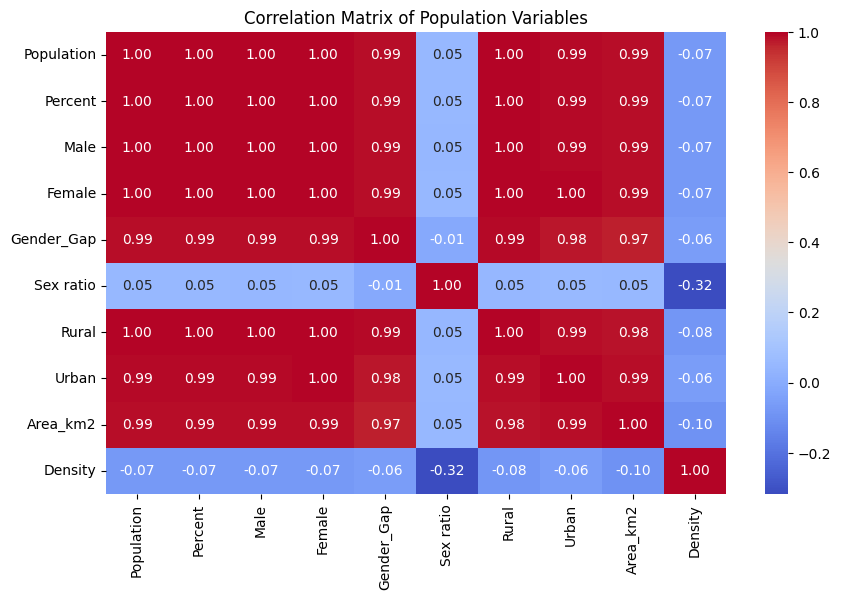

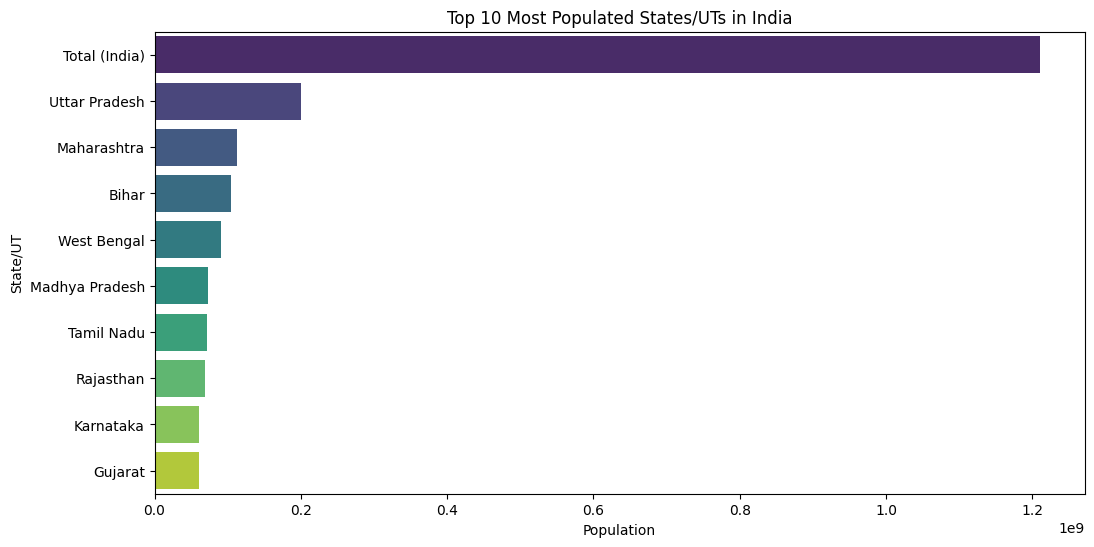

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Population Variables")
plt.show()

top_populated = df.sort_values(by="Population", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    x="Population",
    y="State/UT",
    hue="State/UT",
    data=top_populated,
    palette="viridis",
    legend=False
)

plt.title("Top 10 Most Populated States/UTs in India")
plt.xlabel("Population")
plt.ylabel("State/UT")
plt.show()

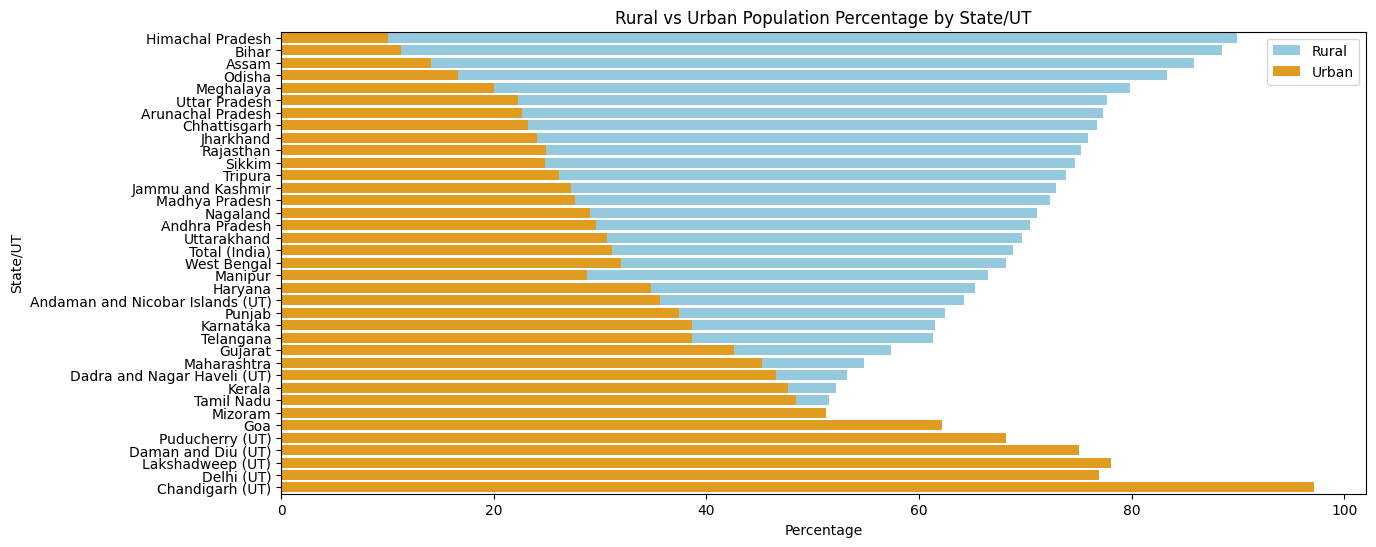

In [11]:
df['Rural_Percent'] = (df['Rural'] / df['Population']) * 100
df['Urban_Percent'] = (df['Urban'] / df['Population']) * 100

plt.figure(figsize=(14,6))
df_sorted = df.sort_values('Rural_Percent', ascending=False)

sns.barplot(x='Rural_Percent', y='State/UT', data=df_sorted, label="Rural", color='skyblue')
sns.barplot(x='Urban_Percent', y='State/UT', data=df_sorted, label="Urban", color='orange')

plt.title("Rural vs Urban Population Percentage by State/UT")
plt.xlabel("Percentage")
plt.ylabel("State/UT")
plt.legend()
plt.show()

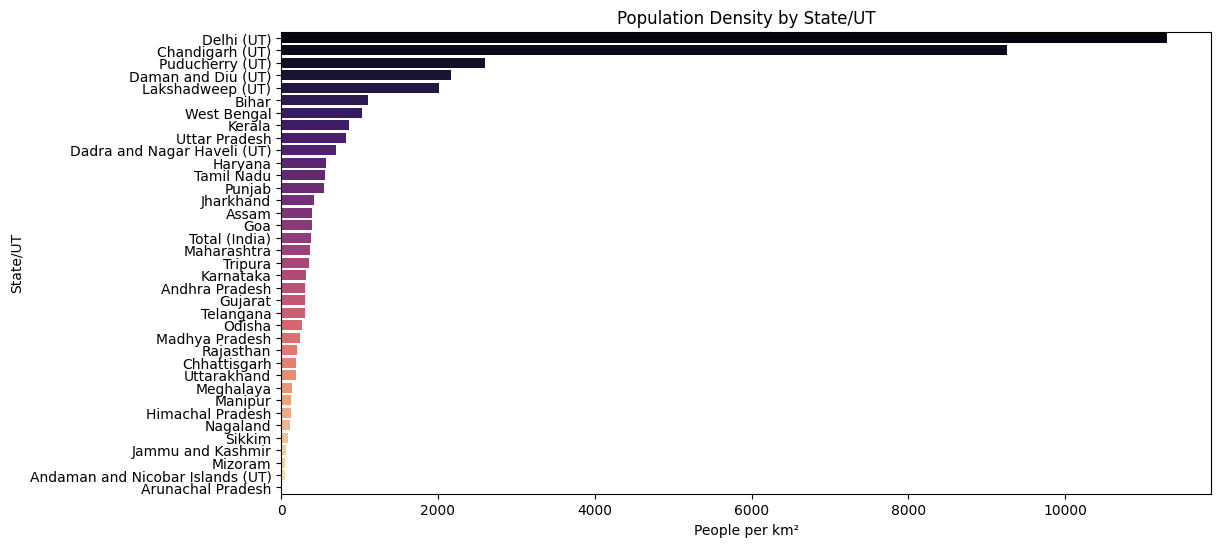

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(
    y='State/UT',
    x='Density',
    data=df.sort_values('Density', ascending=False),
    hue='State/UT',
    palette="magma",
    legend=False
)
plt.title("Population Density by State/UT")
plt.xlabel("People per km²")
plt.ylabel("State/UT")
plt.show()

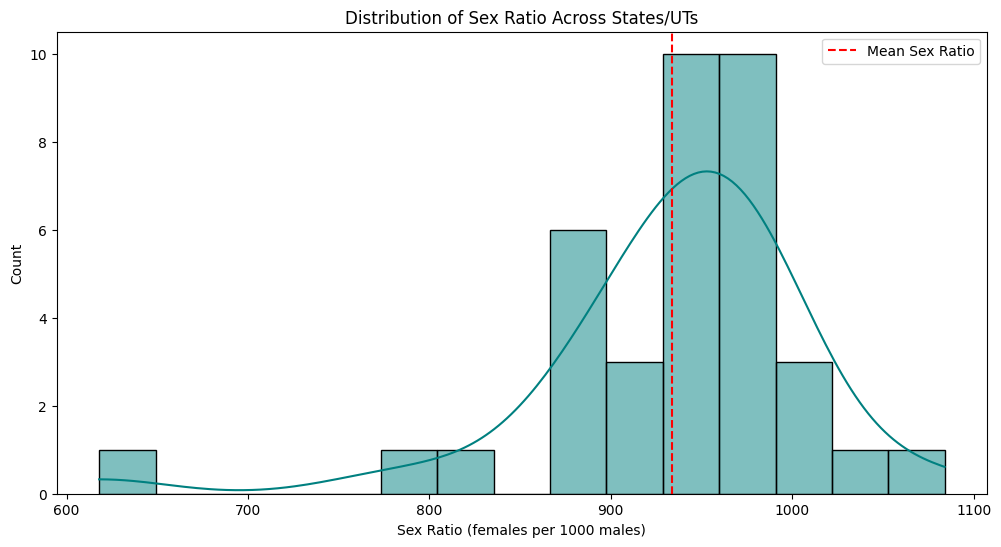

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(df['Sex ratio'], bins=15, kde=True, color='teal')
plt.axvline(x=df['Sex ratio'].mean(), color='red', linestyle='--', label='Mean Sex Ratio')
plt.title("Distribution of Sex Ratio Across States/UTs")
plt.xlabel("Sex Ratio (females per 1000 males)")
plt.legend()
plt.show()

In [14]:
area_pop_corr = df['Area_km2'].corr(df['Population'])
print(f"Correlation between Area and Population: {area_pop_corr:.2f}")

max_sex_ratio = df.loc[df['Sex ratio'].idxmax()]
min_sex_ratio = df.loc[df['Sex ratio'].idxmin()]
print("State with highest sex ratio:", max_sex_ratio['State/UT'], "-", max_sex_ratio['Sex ratio'])
print("State with lowest sex ratio:", min_sex_ratio['State/UT'], "-", min_sex_ratio['Sex ratio'])

Correlation between Area and Population: 0.99
State with highest sex ratio: Kerala - 1084
State with lowest sex ratio: Daman and Diu (UT) - 618
